# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 

### This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.

### columns names

- 'id' : id of the movie, 
- 'imdb_id' : imdb id,
- 'popularity' : the popularity of the movie,
- 'budget' : the cost for the movie in dollers,
- 'revenue' : the revenue of the movie in doller ,
- 'original_title' : the title of the movie,
- 'cast' : cast fort the movie contain multiple values separated by pipe (|) characters. ,
- 'homepage' : home page website of the movie,
- 'director' : director name ,
- 'tagline' : the tagline of the movie,
- 'keywords' : keywords associated with the movie,
- 'overview' : shot discribtion of the movie,
- 'runtime' : runtime of the movie in minits,
- 'genres' : movie type contain multiple values separated by pipe (|)characters. ,
- 'production_companies' : production_companies,
- 'release_date' : full release date,
- 'vote_count' : number of vote count,
- 'vote_average' : average vote,
- 'release_year' : release year only,
- 'budget_adj' : the budget of the associated movie in terms of 2010 dollars,accounting for inflation over time.,
- 'revenue_adj' : the revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time.

### Question(s) for Analysis

- Question 1 (what is the top 100 rating movies during this period?)
- Question 2 (what is the top 10 high-profit movies ?)
- Question 3 (what are the top 5 directors who made a lot of those best movies ? )
- Question 4 (what is the distribution of "Vote average" ?)
- Question 5 (what is the relationship between "vote-avg" and "popularity" ?)

In [1]:
# importing libiraies
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
#loading dataset

df = read_csv('tmdb-movies.csv')

In [3]:
#making function to recheck data faster
def check_data(df):
    print(df.shape)
    print(df.info())

In [4]:
#shape of the data
check_data(df)

(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release

In [5]:
#show 5 samples of the data
df.sample(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5502,82700,tt1815862,1.284460,130000000,243843127,After Earth,Jaden Smith|Will Smith|Sophie Okonedo|ZoÃ« Kra...,NaN,M. Night Shyamalan,"Danger is real, fear is a choice",...,One thousand years after cataclysmic events fo...,100,Science Fiction|Action|Adventure,Columbia Pictures|Blinding Edge Pictures|Overb...,5/30/13,1792,5.1,2013,1.216843e+08,2.282453e+08
1131,251321,tt2494384,0.191040,8000000,53086,Aloft,Jennifer Connelly|MÃ©lanie Laurent|Cillian Mur...,NaN,Claudia Llosa,NaN,...,"As we follow a mother and her son, we delve in...",112,Drama,Arcadia Motion Pictures|Wanda VisiÃ³n S.A.|Buf...,2/12/14,20,5.1,2014,7.368728e+06,4.889704e+04
570,295886,tt3262990,0.083912,1900000,0,Brotherly Love,Keke Palmer|Cory Hardrict|Eric D. Hill Jr.|Qui...,NaN,Jamal Hill,NaN,...,West Philadelphia basketball star Sergio Taylo...,89,Drama,NaN,4/24/15,11,7.4,2015,1.747999e+06,0.000000e+00
6263,2026,tt0340163,0.887848,52000000,77944725,Hostage,Bruce Willis|Kevin Pollak|Jimmy Bennett|Michel...,NaN,Florent-Emilio Siri,Every Second Counts,...,When a mafia accountant is taken hostage on hi...,113,Mystery|Drama|Thriller|Crime,Miramax Films|Cheyenne Enterprises|Yari Film G...,3/9/05,280,6.0,2005,5.806129e+07,8.703022e+07
5553,190847,tt1709143,0.916811,0,0,The Last Days on Mars,Liev Schreiber|Romola Garai|Elias Koteas|Olivi...,NaN,Ruairi Robinson,The search for life is about to end.,...,On the last day of the first manned mission to...,98,Science Fiction|Thriller|Horror,Warner Bros.,8/11/13,167,5.1,2013,0.000000e+00,0.000000e+00


## drop not useful columns

In [6]:
# drop unuseful columns from the data
columns_drop = ['id','imdb_id','tagline','keywords','overview','homepage','genres','budget_adj','revenue_adj','cast','release_date','production_companies']
df.drop(columns_drop,axis=1,inplace = True)

In [7]:
df.sample(5)

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
9964,0.142949,0,0,Punishment Park,Peter Watkins,88,16,6.6,1971
3153,0.316727,0,0,Anaconda 3: Offspring,Don E. FauntLeRoy,91,21,4.4,2008
895,0.498787,0,0,The Town that Dreaded Sundown,Alfonso Gomez-Rejon,85,99,5.8,2014
10780,0.409377,3500000,24046533,Invasion of the Body Snatchers,Philip Kaufman,115,87,6.5,1978
1687,0.333551,0,0,Fame,Kevin Tancharoen,107,88,5.3,2009


In [8]:
#check dataframe and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB



### Data Cleaning


## Solve duplicated rows

### - check for duplicated rows

In [9]:
#show number of dublicated rows
df.duplicated().sum()

1

### - drop duplicated row

In [10]:
#drop dublicated rows
df.drop_duplicates(inplace=True)

## solve nan values

### - Replace missed values for "director" to "not-mentioned" instead of nan

In [11]:
#replace nan with 'not-mentioned'
df.director.fillna('not-mentioned',inplace =True)

### - check again for duplicated 

In [12]:
#check dataframe again
check_data(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 848.8+ KB


## discover zero values for revenue an budget

In [13]:
#show columns that have zero values
df.query('budget == 0 or revenue == 0')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year
30,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,425,6.4,2015
36,3.358321,0,22354572,Solace,Afonso Poyart,101,474,6.2,2015
48,2.932340,30000000,0,Wild Card,Simon West,92,481,5.3,2015
67,2.331636,20000000,0,Survivor,James McTeigue,96,280,5.4,2015
72,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,81,5.5,2015
...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Bruce Brown,95,11,7.4,1966
10862,0.065543,0,0,Grand Prix,John Frankenheimer,176,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,22,5.4,1966


conclusion : we cann't replace zeros with mean becuse there is huge number of affected rows

so we can skip zeros but into considerations

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (what is the top 100 rating movies during this period?)

In [14]:
#making rating score that shows movie effectiveness
df['rating_score']=df['vote_average']*df['vote_count']

In [15]:
#sort dataframe descending by rating count
best_100 = df.sort_values('rating_score', ascending=False).head(100)
best_100.sample(5)

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,rating_score
8974,2.170136,70000000,481840909,Saving Private Ryan,Steven Spielberg,169,3396,7.7,1998,26149.2
5425,4.946136,200000000,1215439994,Iron Man 3,Shane Black,130,6882,6.9,2013,47485.8
2875,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,8432,8.1,2008,68299.2
5426,4.942928,75000000,117698894,Now You See Me,Louis Leterrier,115,3453,7.3,2013,25206.9
10223,2.204926,63000000,920100000,Jurassic Park,Steven Spielberg,127,3169,7.4,1993,23450.6


In [16]:
#recheck data
check_data(df)

(10865, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10865 non-null  object 
 5   runtime         10865 non-null  int64  
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
 9   rating_score    10865 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 933.7+ KB
None


### Research Question 2 (what is the top 10 high-profit movies ?)

In [17]:
# calculate profit for each row
best_100['profit']=best_100['revenue']-best_100['budget']
best_100.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,rating_score,profit
1919,9.363643,160000000,825500000,Inception,Christopher Nolan,148,9767,7.9,2010,77159.3,665500000
2875,8.466668,185000000,1001921825,The Dark Knight,Christopher Nolan,152,8432,8.1,2008,68299.2,816921825
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,8903,7.3,2012,64991.9,1299557910
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,8458,7.1,2009,60051.8,2544505847
4364,5.944518,100000000,425368238,Django Unchained,Quentin Tarantino,165,7375,7.7,2012,56787.5,325368238


In [18]:
#sort data by profit descending
best_profit = best_100.sort_values('profit',ascending=False).head(10)
best_profit.head()

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,rating_score,profit
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,8458,7.1,2009,60051.8,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,39690.0,1868178225
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,4654,7.3,1997,33974.2,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,36153.0,1363528810
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,8903,7.3,2012,64991.9,1299557910


In [19]:
#recheck data
check_data(best_profit)

(10, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1386 to 5425
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10 non-null     float64
 1   budget          10 non-null     int64  
 2   revenue         10 non-null     int64  
 3   original_title  10 non-null     object 
 4   director        10 non-null     object 
 5   runtime         10 non-null     int64  
 6   vote_count      10 non-null     int64  
 7   vote_average    10 non-null     float64
 8   release_year    10 non-null     int64  
 9   rating_score    10 non-null     float64
 10  profit          10 non-null     int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 960.0+ bytes
None


Text(0.5, 1.0, 'Top 10 high-profit movies')

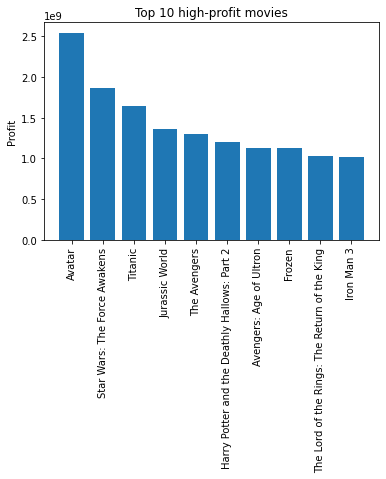

In [20]:
#show bar chart of the result 
plt.bar(best_profit.original_title,best_profit.profit)
plt.xticks(rotation=90)
plt.ylabel("Profit")
plt.title('Top 10 high-profit movies')

conclusion : "Avatar" has achieved the highest revenue during this period

### Research Question 3 (what are the top 5 directors who made a lot of those best movies ? )

In [21]:
#get top 5 directors
best_100['director'].value_counts().head(5)

Peter Jackson        6
Christopher Nolan    5
Quentin Tarantino    4
David Yates          4
Ridley Scott         3
Name: director, dtype: int64

conclusion : "Peter Jackson" made 6 movies of top 100 movies so he is a good director

### Research Question 4 (what is the distribution of "Vote average" ?)

In [22]:
#discribe data
df["vote_average"].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

Text(0, 0.5, 'Vote average')

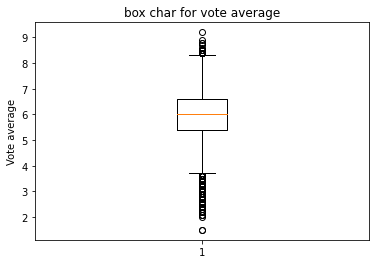

In [23]:
#show box char for vote average
plt.boxplot(df.vote_average)
plt.title('box char for vote average')
plt.ylabel("Vote average")

Text(0.5, 0, 'Vote average')

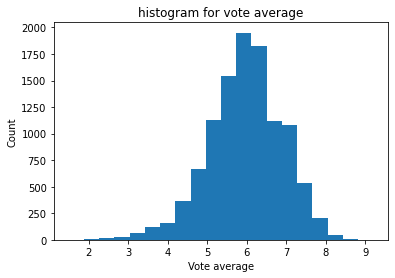

In [24]:
#show histogram char for vote average
plt.hist(df.vote_average,bins=20)
plt.title('histogram for vote average')
plt.ylabel('Count')
plt.xlabel('Vote average')

conclusion : vote avreage follows normal distribution

### Research Question 5 (what is the relationship between "vote-avg" and "popularity" ?)

Text(0.5, 1.0, 'relationship between "vote-avg" and popularity')

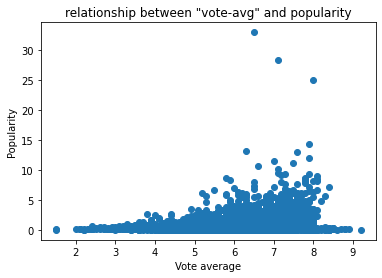

In [25]:
#show scatter char to fing relationship between "vote-avg" and "popularity"
plt.scatter(df['vote_average'],df['popularity'])
plt.xlabel('Vote average')
plt.ylabel('Popularity')
plt.title('relationship between "vote-avg" and popularity')

conclusion : there is positive relationship , but there are 3 movies are popular more than usual

In [26]:
#sort Values by 'popularity'
df.sort_values('popularity', ascending=False)[['original_title','popularity']].head(3)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134


conclusion : there are 3 movies that have popularity more than usual 
- Jurassic World
- Mad Max: Fury Road
- Interstellar

<a id='conclusions'></a>
## Conclusions


### Question 1 (what is the top 100 rating movies during this period?)
- movie success not only depending on vote average or vote count, is a score of multiplying both.
- not all popular movies have a high vote average.
- I discovered the top 100 movies during this period.

### Question 2 (what is the top 10 high-profit movies ?)
- I discovered the top 10 high-profit movies.
- "Avatar" has achieved the highest revenue during this period

### Question 3 (what are the top 5 directors who made a lot of those best movies ? )
- Peter Jackson        6 movies
- Christopher Nolan    5 movies
- Quentin Tarantino    4 movies
- David Yates          4 movies
- J.J. Abrams          3 movies
- conclusion : "Peter Jackson" made 6 movies of top 100 movies so he is a good director.

### Question 4 (what is the distribution of "Vote average" ?)
- vote average follows the normal distribution.
- most of the movies have a vote average between 5.5 to 6.5.

### Question 5 (what is the relationship between "vote-avg" and "popularity" ?)
- there is a positive relationship. 
- there are 3 movies that are popular more than usual (Jurassic World,Mad Max: Fury Road,Interstellar)





## Limitaions
- 75% of rows have the budget or revenue zero values this will prevent us to calculate the actual revenue for each movie.
- dataset doesn't contain new movies that relaised after 2016
- it will be better if the dataset contains other features like (actors rating, country , awards received)